In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




# Initialization


    04/02/2019 need to approve parse the meta table, glycan id (unresolved)
    04/14/2019 modified for the paper 


In [15]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_

In [16]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [5]:
# reload(pipeline_functions)
meta_name = pd.read_csv(os.path.join(working_addr,'source_data','glycan_id_list.txt'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()
data_type = 'used'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)


Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
Loaded the glycan structure from glycan_glycoct_dict


In [6]:
reload(pipeline_functions)
reload(merge_substructure_vec)
glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
                                                                     num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, 
                                                                     forced=True)

start glycan_dict
start parallel parsing 77 glycans
start G60415BS
start 1417.1
start G49721VX
start G07483YN
start G39213VZ
start 1754.1
start G80858MF
start G12398HZ
G60415BS 6 0.06318807601928711
start G24987DS
1417.1 6 0.07633113861083984
start G58667NI
G49721VX 7 0.14678001403808594
G07483YN 7 0.16041302680969238
start G36191CD
start G80393PG
G39213VZ 7 0.17865586280822754
start G39439UR
1754.1 8 0.28032898902893066
start G04483SK
G12398HZ 8 0.29254603385925293
start G52428MJ
G80858MF 8 0.36675310134887695
start 2244.1
G24987DS 8 0.5194530487060547
start G03445UI
G58667NI 9 0.7388038635253906
start G00176HZ
G36191CD 9 0.6882879734039307
start G23295TF
G39439UR 9 0.7609720230102539
start 2401.1
G80393PG 9 0.8098340034484863
start G10691MJ
G04483SK 10 1.0918550491333008
start G79457WN
G52428MJ 10 1.2256169319152832
start G30460NZ
2244.1 10 1.0467419624328613
start 2605.1
G03445UI 10 1.2677507400512695
G23295TF 10 1.0398519039154053
start 2605.2
start 2646.1
G00176HZ 10 1.12638306617

In [7]:
reload(pipeline_functions)
# print(keywords_dict['name_to_id_addr'])
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundance_table.xls'))

_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=False, 
                                                           already_glytoucan_id=False,
                                                           external_profile_naming=True, 
                                                           forced=True)

abd_list 57 profile_list 34
57 34


## We only chose 16 glycoprofiles out of 34 glycoprofiles
    1. There are 34 glycoprofiles in original paper. Yang, Z. et al. Engineered CHO cells for production of diverse, homogeneous glycoproteins. Nat. Biotechnol. 33, 842–844 (2015). 
    2. We only chose 16 gycoprofiles that overlap with glycoprofiles in Čaval, T., Tian, W., Yang, Z., Clausen, H. & Heck, A. J. R. Direct quality control of glycoengineered erythropoietin variants. Nat. Commun. 9, 3342 (2018). Both data are from the same lab. 
    3. We are compareing the similarity of clustering results and showed the clustering difference in supplementary figure S2.


In [8]:
_name_dict = json_utility.load_json(keywords_dict['source_dir']+'external_profile_naming.json')
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6",
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

select_col=[]
_ = {}
for i,j in _name_dict.items():
    _[j] = i
    
for i in selected_name_list:
    select_col.append(_[i])
print(select_col)

['30', '25', '34', '21', '22', '5', '20', '18', '6', '7', '8', '1', '9', '28', '3', '4']


In [9]:
feature_name = []
profile_name = []

selected_profile = [30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
for i in selected_profile:
    profile_name.append(_name_dict[str(i)])
    for j in glycoprofile_list[i-1].glycan_id_list:
        feature_name.append(j)

feature_name = list(set(feature_name))
print(feature_name)
print(selected_profile)
print(profile_name)

['G40242TG', 'G37597FW', '1754.1', 'G00176HZ', '4675.1', 'G54953LX', '2605.1', 'G04483SK', 'G39764AC', 'G88127MB', 'G49721VX', '3416.3', 'G23295TF', 'G20924UR', 'G56516KW', 'G76812VG', 'G99891PR', '3416.1', 'G60415BS', '2693.2', 'G39813YP', '5312.1', 'G75308SV', 'G86696LV', '4587.1', 'G58667NI', '2967.1', 'G49604DB', 'G80264ZA', '5486.1', 'G90130AG', 'G39439UR', '3416.2', 'G05203UQ', 'G12398HZ', 'G80393PG', '4041.1', 'G07483YN', 'G05098FE', 'G85809SI', 'G88966ZO', 'G30460NZ', 'G79457WN', 'G80858MF', '3055.1', '2401.1', 'G17689DH', 'G79412GP', '3592.1', 'G10691MJ', 'G09280JF', '3865.1', '3457.1', 'G54338PJ', 'G07568IR']
[30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
['EPO127.mgat1.', 'EPO174.mgat2.', 'EPO266.fut8.', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6', 'B4GalT1', 'B4GalT2', 'B4GalT3', 'WT', 'B4GalT4', 'EPO78.mgat4B.', 'mgat4A.mgat4B', 'mgat5']


# Raw glycan clustering plot for Fig 2a and Fig S1, 52/77 of glycans in 16 glycoprofiles has non-zero abundance 
### Note: the order of rows and columns might be different from the plots in paper while the hierachy remain stable, because the orders are automatically arranged by algorithm.

In [10]:
import pandas as pd
import numpy as np
abundance_table = np.zeros((len(feature_name), len(selected_profile)))

for i in range(len(selected_profile)):
    _profile_idex = selected_profile[i]-1
    _profile_dict = dict(zip(glycoprofile_list[_profile_idex].glycan_id_list, glycoprofile_list[_profile_idex].relative_abundance))
    
    for j in range(len(feature_name)):
        if feature_name[j] in _profile_dict:
            abundance_table[j,i] = _profile_dict[feature_name[j]]
index_list = []
for i in range(len(abundance_table)):
    if sum(abundance_table[i,:])!=0:
        index_list.append(i)
# len(index_list)
abundance_table = abundance_table[index_list,:]

#     abundance_table[i] = abundance_table[i]/sum(abundance_table[i])
feature_name=[feature_name[i] for i in index_list]
pd_table = pd.DataFrame(abundance_table, columns=profile_name, index=feature_name)
pd_table.head()


,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G40242TG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.95,0.0,0.0,0.0,0.0,0.0,0.00,0.0
G37597FW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.09,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1754.1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
G00176HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,50.59,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4675.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.77,0.0


In [11]:
for i in pd_table.columns:
#     print(i,pd_table[i], sum(pd_table[i]))
    pd_table[i] = pd_table[i]/sum(pd_table[i])
#     print(pd_table[i])
pd_table.head()

,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G40242TG,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.038810,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
G37597FW,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.049194,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1754.1,0.481719,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
G00176HZ,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.131331,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4675.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.006297,0.0


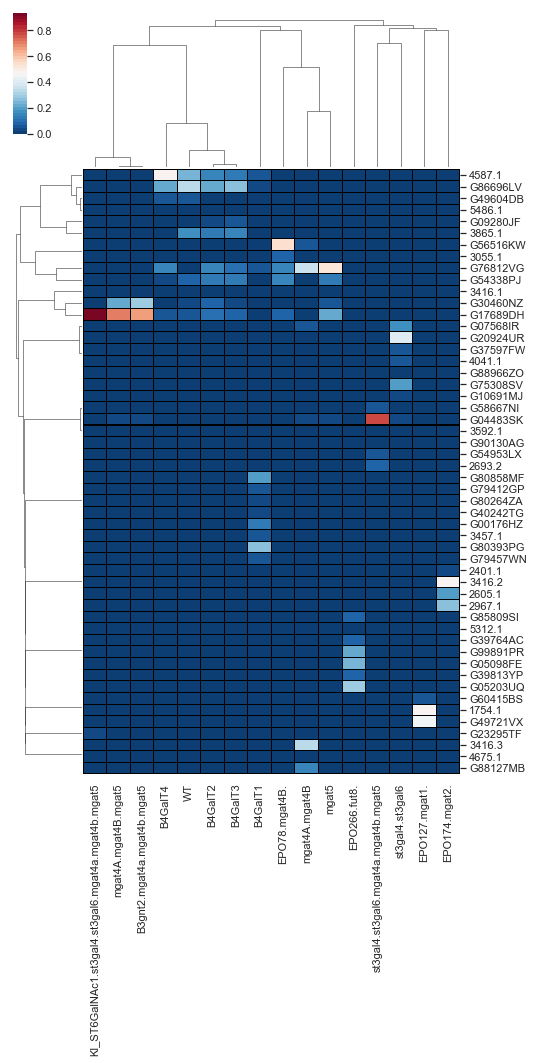

In [12]:
name_prefix = 'full_glycan'
# pd_table.to_csv('/Users/apple/PycharmProjects/Glycompare/paper_supplementory/data_generator/paper_epo/intermediate_file/glycan_abd_table.xls')

cmap = sns.color_palette("RdBu_r", 40)
# g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01, annot=False, figsize=(7,7),method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster.eps')
g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01
                   , figsize=(8,14), linecolor='black', method='complete')
plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster_no_anno.eps')
# clustering_analysis_pip.draw_profile_cluster(g, pd_table, profile_name, color_threshold=0.95)

# load substructure_abd table

the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  722  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Start dropping nodes with weight zero, nodes count: 722
Nodes left [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,

(120, 16)

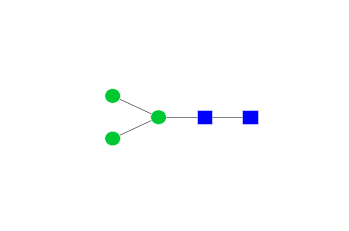

In [17]:
reload(pipeline_functions)
core=select_motifs.nglycan_core
motif_abd_table, substructure_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
                                                     linkage_specific=linkage_specific,   
                                                                                     core=core,
                                                     only_substructures_start_from_root=True,
                                                     select_col= select_col)
motif_abd_table.shape

# Raw clustering plot for Figure 2b
### Note: we tested this plot on different version of python. We found that the orders of rows and columns might be different from the plot in paper while the clustering hierachy structrue remain same. The reason is that the orders are automatically arranged by algorithm.
### Note: the raw clustering plot for Figure S3 and S4 are also included.

<Figure size 432x288 with 0 Axes>

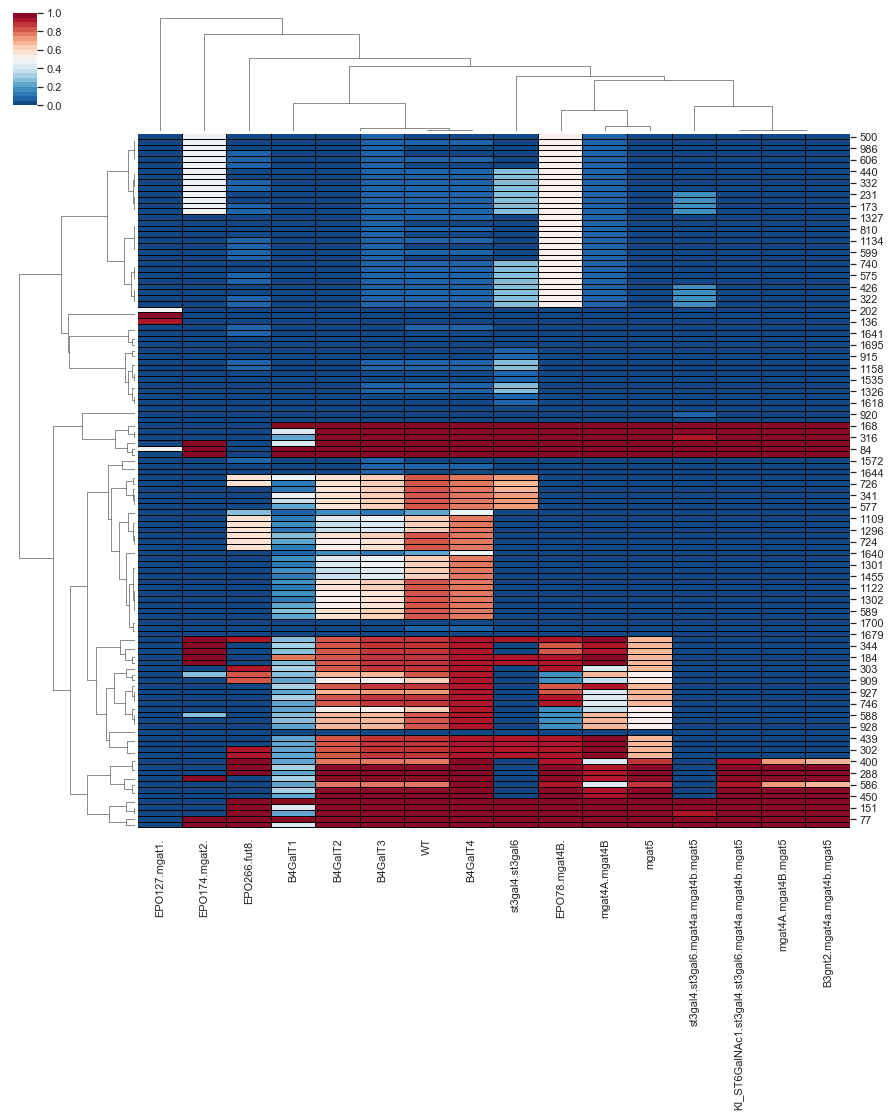

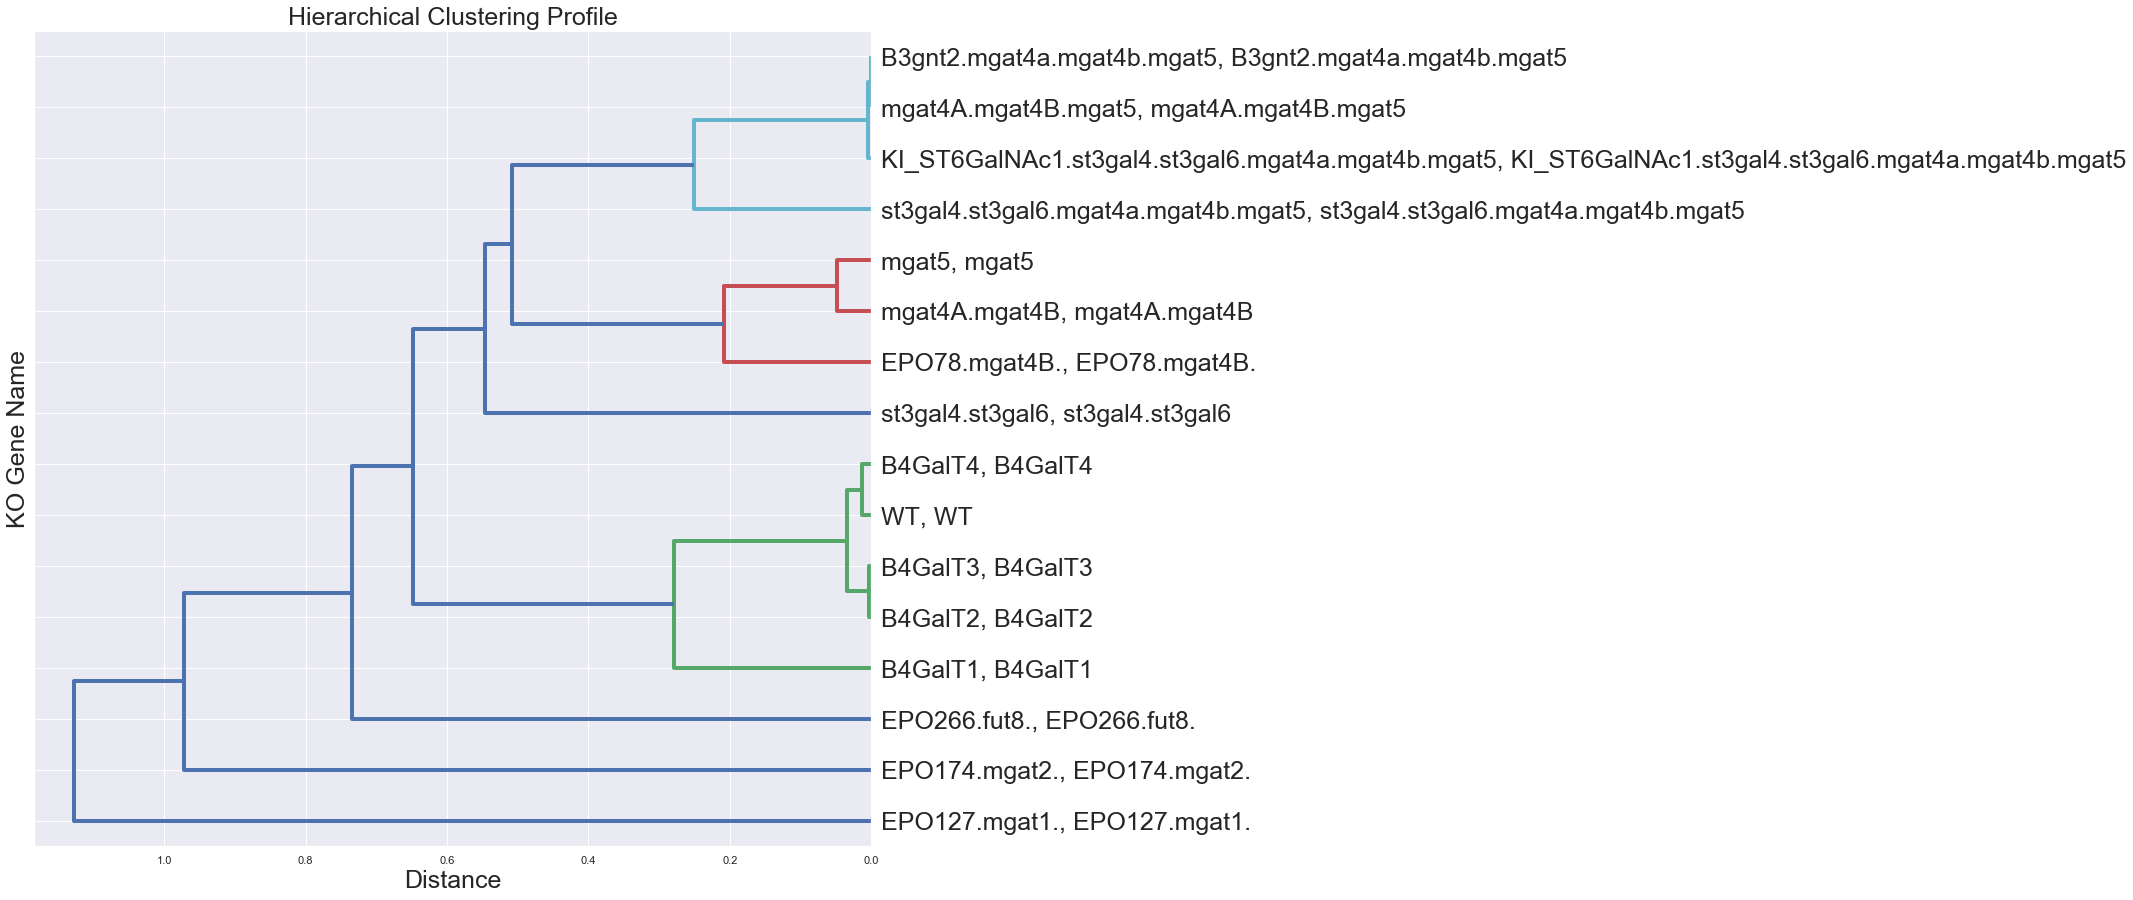

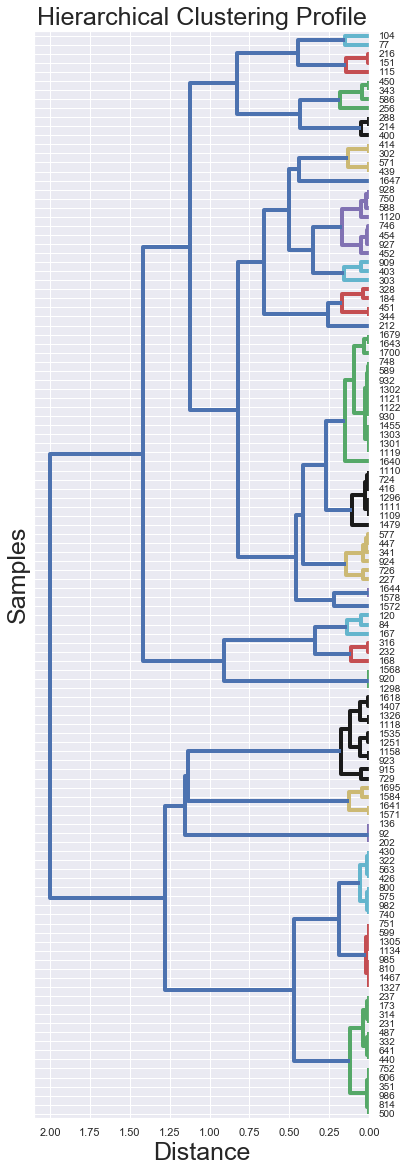

In [18]:
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
                                           motif_abd_table=motif_abd_table, 
                                           select_profile_name = selected_name_list)

[173, 231, 237, 314, 332, 351, 440, 487, 500, 606, 641, 752, 814, 986]
file already exist, will not store
[599, 751, 810, 985, 1134, 1305, 1327, 1467]
file already exist, will not store
[322, 426, 430, 563, 575, 740, 800, 982]
file already exist, will not store
[92, 136, 202]
file already exist, will not store
[1571, 1584, 1641, 1695]
file already exist, will not store
[729, 915, 923, 1118, 1158, 1251, 1326, 1407, 1535, 1618]
file already exist, will not store
[920, 1298, 1568]
file already exist, will not store
[168, 232, 316]
file already exist, will not store
[84, 120, 167]
file already exist, will not store
[1578, 1644]
file already exist, will not store
[1572]
file already exist, will not store
[227, 341, 447, 577, 726, 924]
file already exist, will not store
[416, 724, 1109, 1110, 1111, 1296, 1479]
file already exist, will not store
[589, 748, 930, 932, 1119, 1121, 1122, 1301, 1302, 1303, 1455, 1640, 1643, 1679, 1700]
file already exist, will not store
[184, 328, 344, 451]
file a

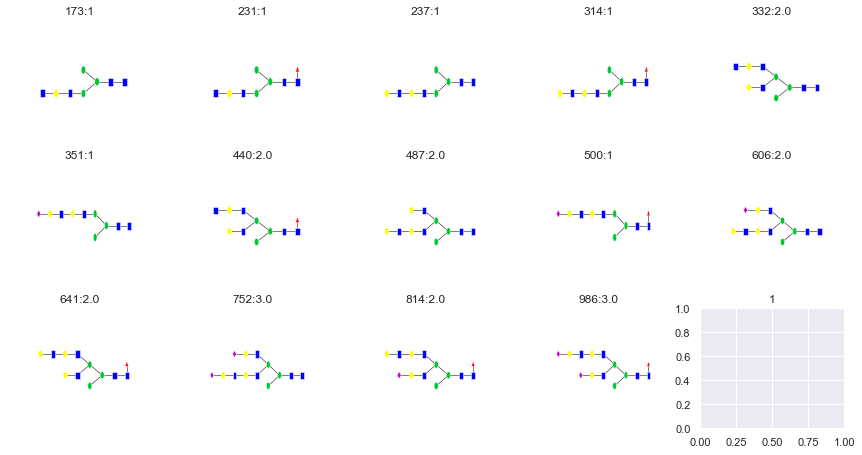

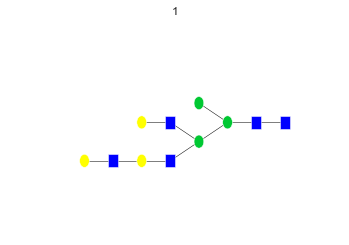

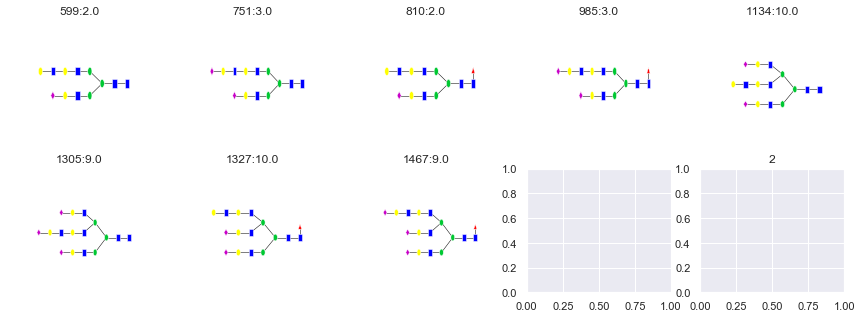

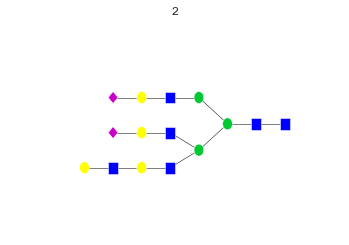

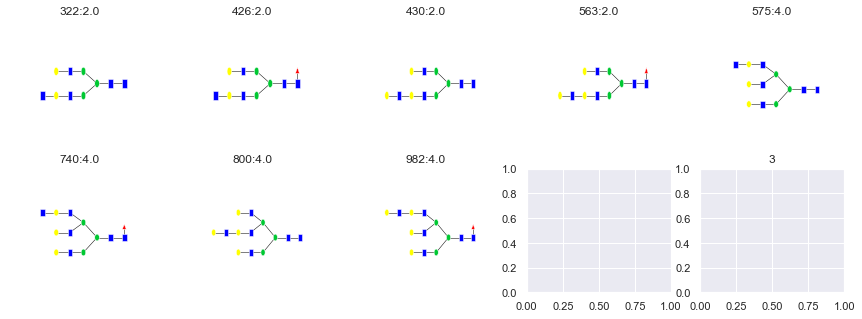

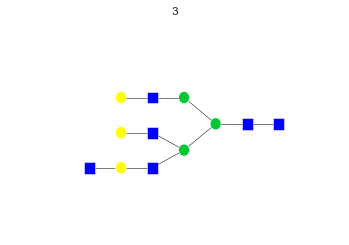

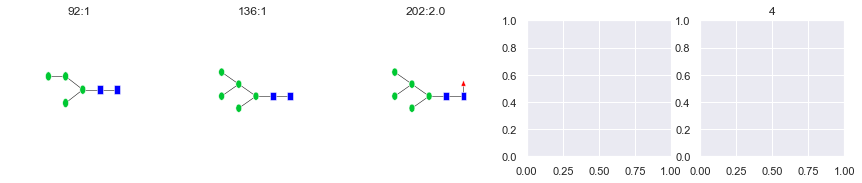

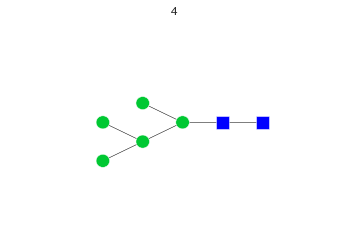

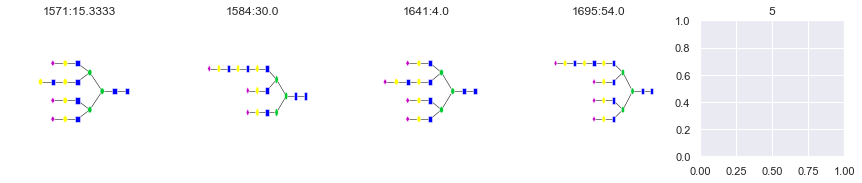

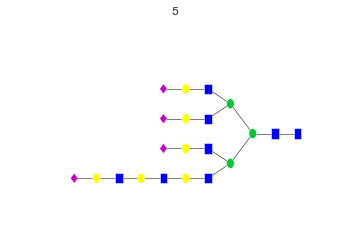

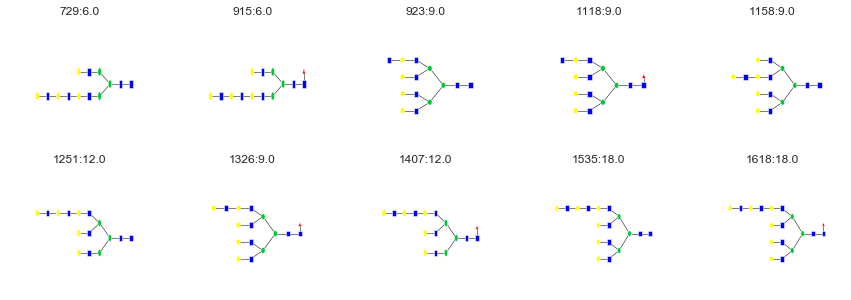

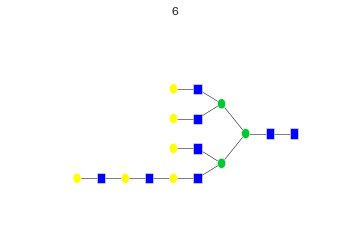

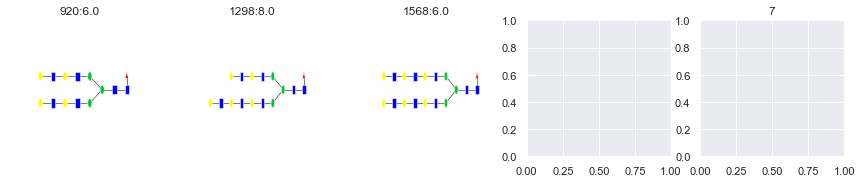

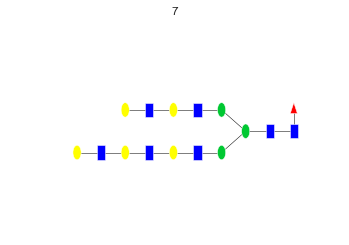

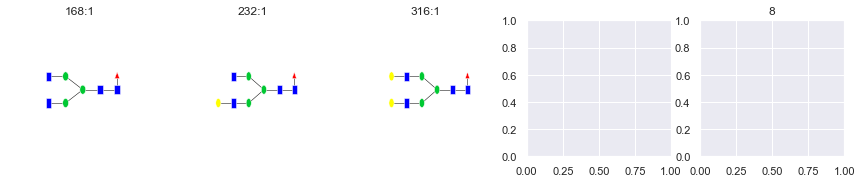

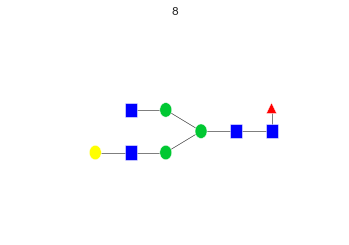

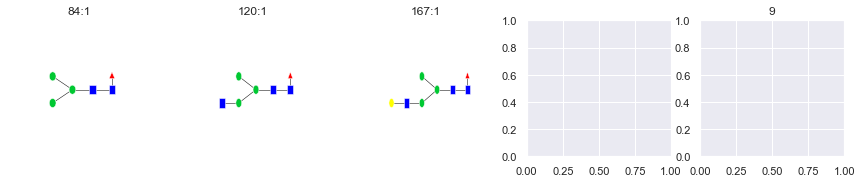

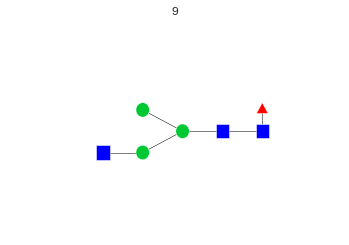

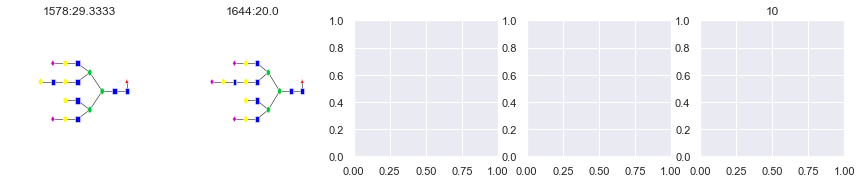

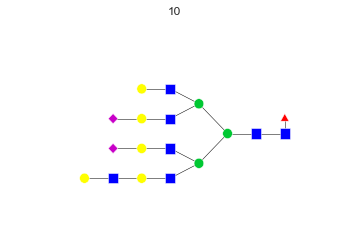

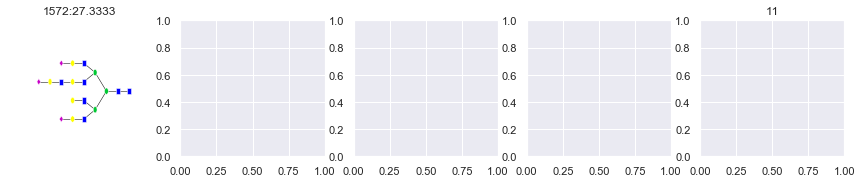

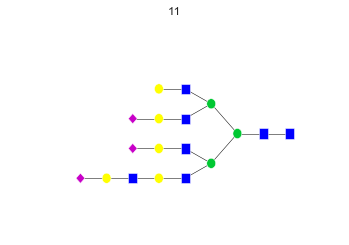

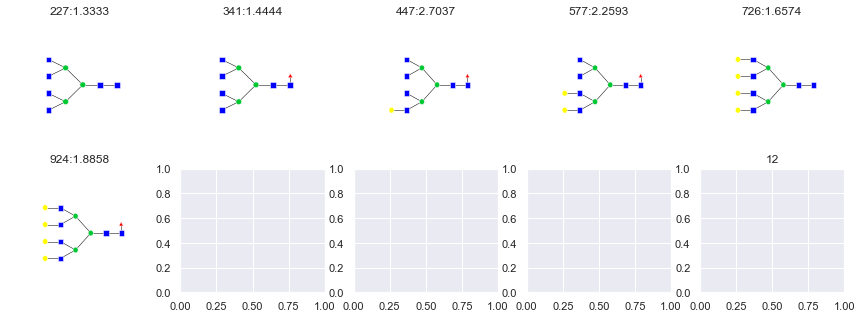

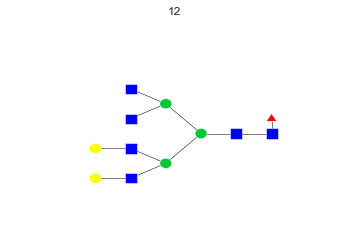

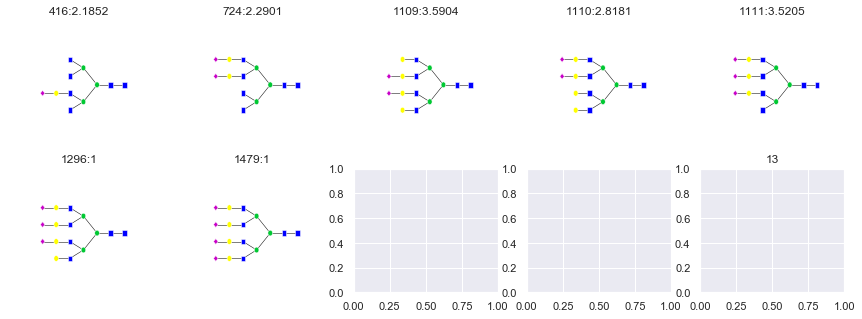

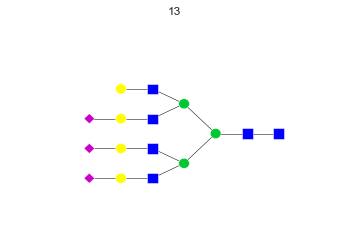

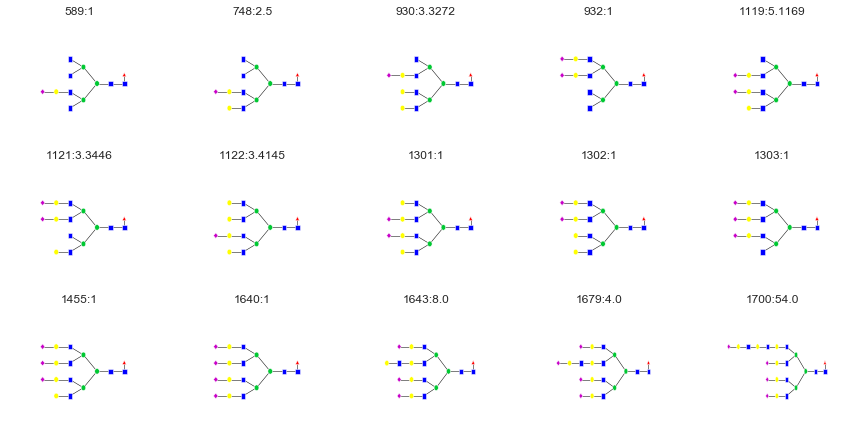

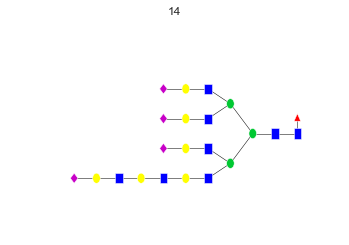

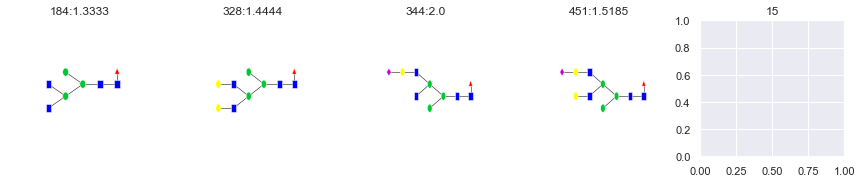

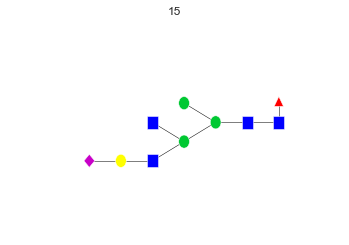

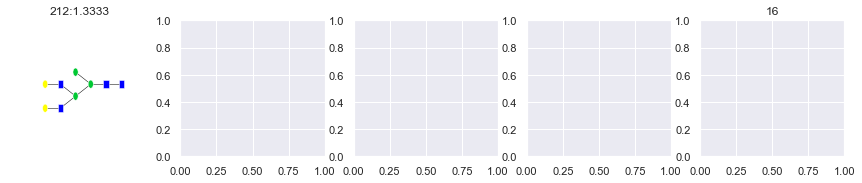

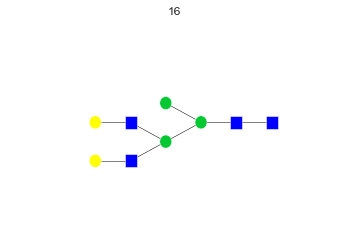

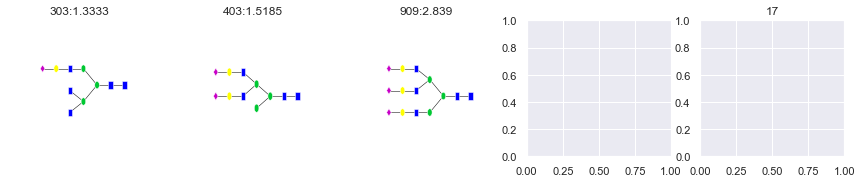

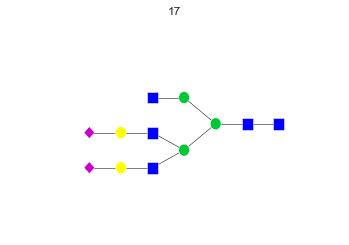

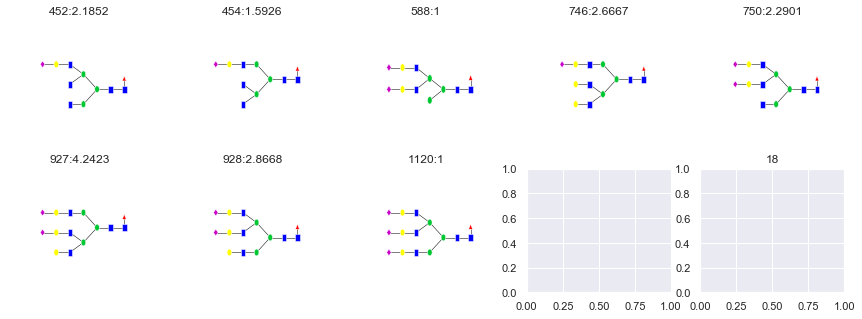

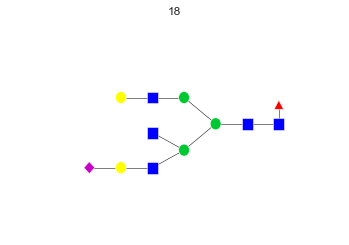

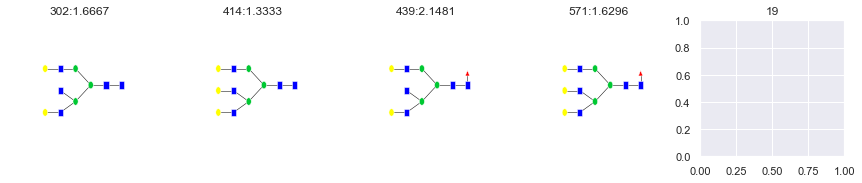

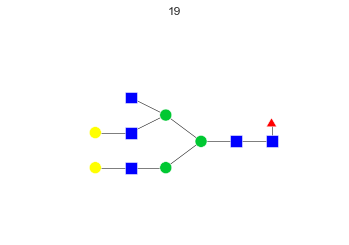

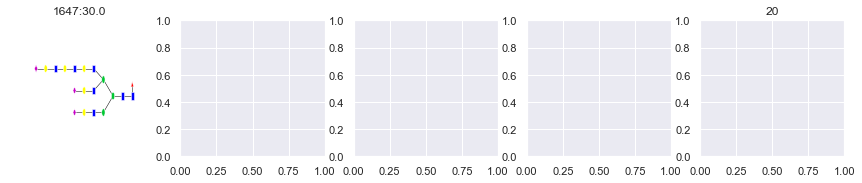

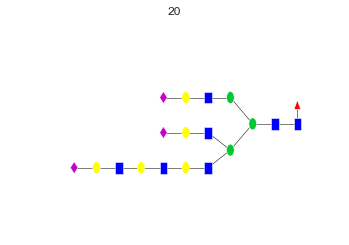

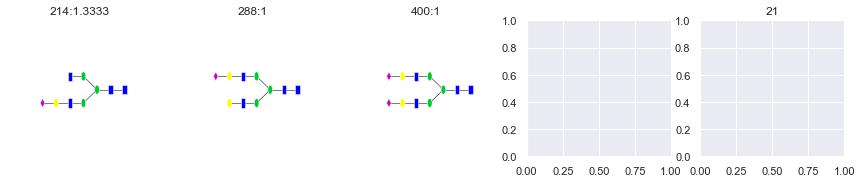

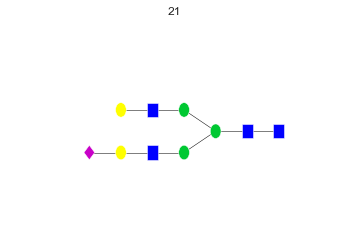

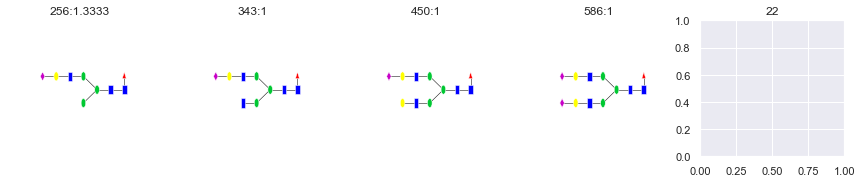

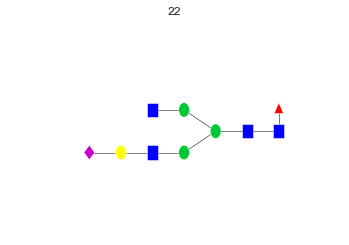

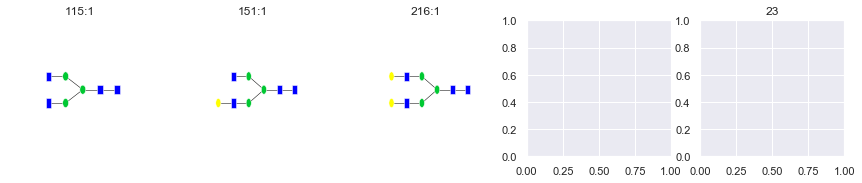

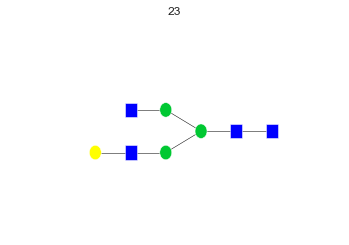

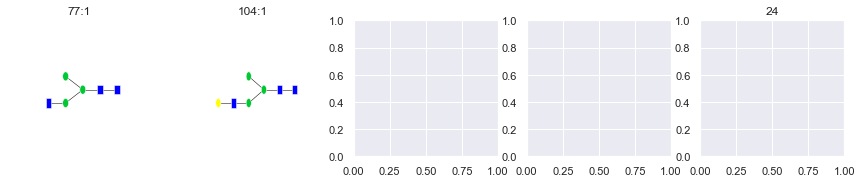

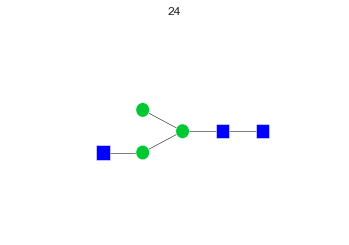

In [21]:
rep_list = pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=glyco_motif_cluster_dict,
                                                        substructure_vec=substructure_lab.substructure_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=True,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        plot_rep=True)

In [22]:
glyco_motif_cluster_dict[22]

[256, 343, 450, 586]

In [23]:
# import seaborn as sns
# import clustering_analysis
# import scipy
# from copy import deepcopy
# reload(clustering_analysis)
# # sns.set("RdBu_r", 7)
# # dropper.drop_node()
# # print("", len(dropper.drop_node()))
# # # motif_abd_table =  substructure_abd_table[_table_col]


# if 51 in mod_nodes:
#     mod_nodes.remove(51)
# # print(motif_abd_table.head())
# df_ncore = deepcopy(motif_abd_table)
# # print(sorted(mod_nodes))
# print(df_ncore.shape)
# # draw plot
# # motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
# """ with n_glycan_core using jaccard for binary and use braycurtis for float
# """
# df_ncore.columns=selected_name_list
# from sklearn import preprocessing
# import numpy as np
# import matplotlib.pyplot as plt

# # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
# df_ncore.to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"selected_abundance_matrix.txt"))
# motif_abd_table.colmuns=selected_name_list
# # motif_abd_table.to_csv(__init__.json_address + r"full_abundance_matrix.txt")
# name_prefix = 'dropped'
# # sns.palplot(sns.color_palette("RdBu_r", 7))
# cmap = sns.color_palette("Reds", 25)
# g = sns.clustermap(df_ncore, metric="correlation", cmap=cmap, linewidths=.02, figsize=(20,20),linecolor='black', method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'pseudo_profile_clustering.svg')
# # clustering_analysis.draw_profile_cluster(g, df_ncore, selected_name_list, name_prefix, color_threshold=0.5, address=keywords_dict['plot_output_dir']+'profile_clustering.svg')
# # cccluster_dict = clustering_analysis.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.185, fig_size=(6, 20))

 

# Role substructure representative abundance table for Fig 2c and Fig 2d 
## Note: Since clusters in cluster map are automatically ordered by searborn, I reorder the clusters with n-glycan features without significantly changing the cluster hierarchy.

## branch: 1-> 4
## galactose: 1-> 4
## sialyation: 1-> 4
## fucose: 0 -> 1

We tested that these 24 clusteres in different computers might have different indexs. But only indexs have inconsistency. 

rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]


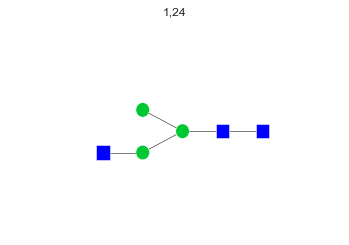

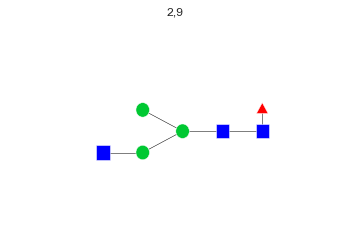

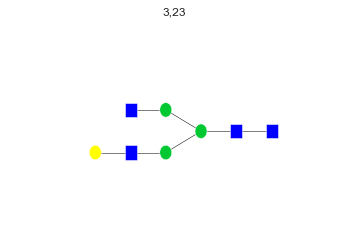

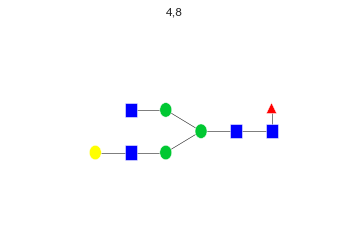

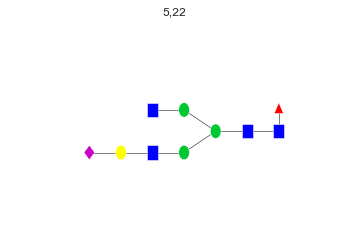

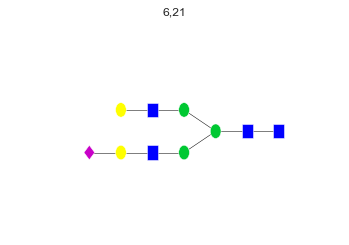

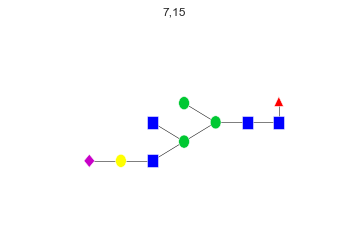

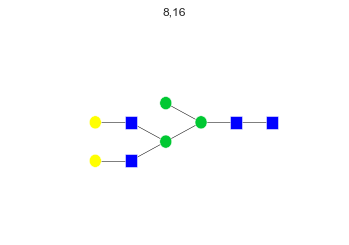

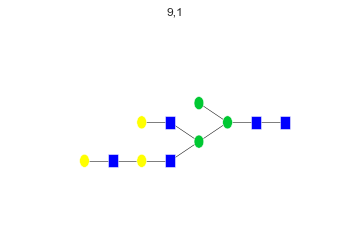

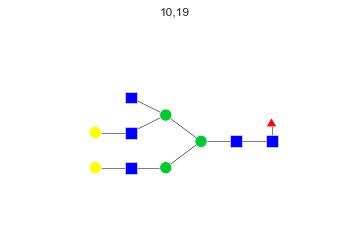

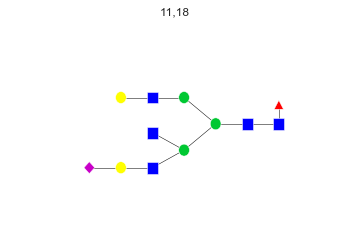

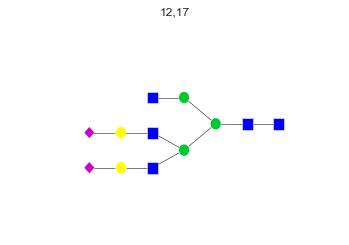

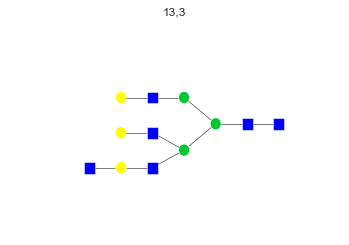

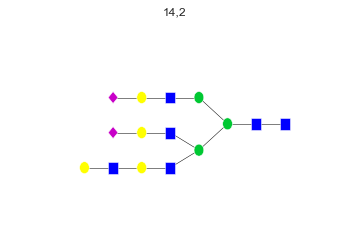

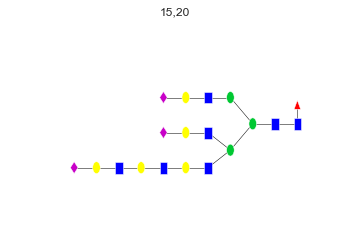

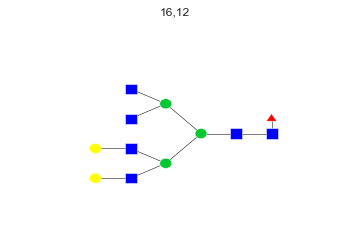

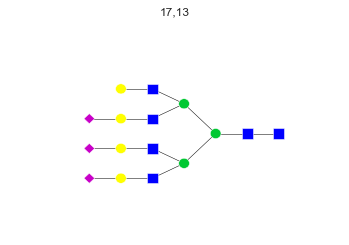

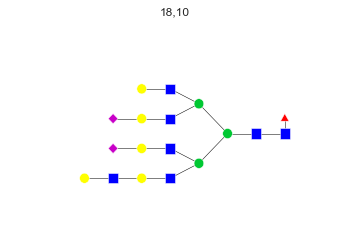

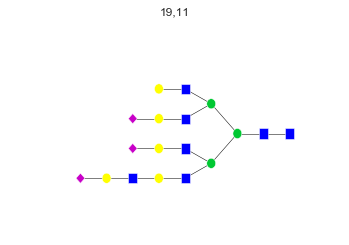

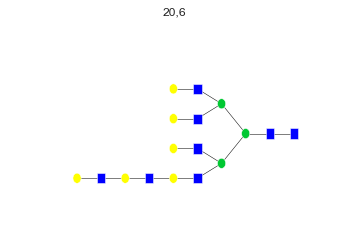

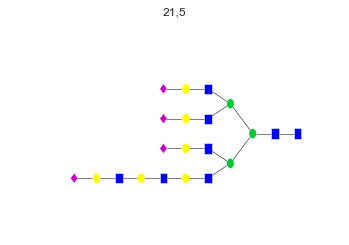

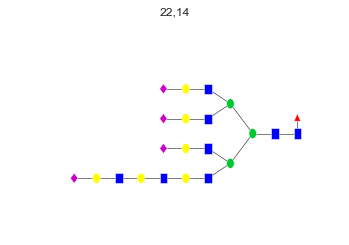

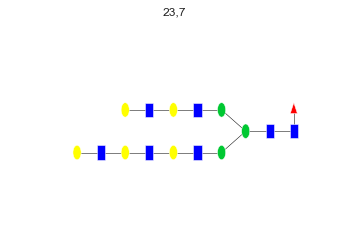

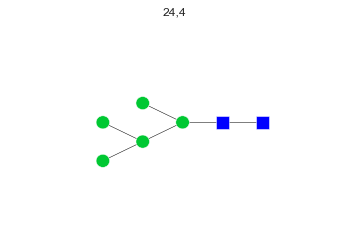

In [24]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8."],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],
6:["st3gal4.st3gal6"], 
7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}


# rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]

rearanged_list = [24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]
for idex, i in enumerate(rearanged_list):
    plot_glycan_utilities.plot_glycan(rep_list[i-1], title=str(idex+1)+','+str(i))
profile_Gly=[]
profile_name_order = []
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(j)
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(glyco_motif_cluster_dict),16))
for i in range(1,len(glyco_motif_cluster_dict)+1):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]


In [25]:
reorder_glycoprofile_table = np.zeros(motif_abd_table.shape)
_cur_row = 0
_index = []
for i in sorted(list(glyco_motif_cluster_dict), reverse=True):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    _index.extend(glyco_motif_cluster_dict[i])
    temp_table = np.array(temp_table)
#     _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    for j in range(temp_table.shape[0]):
        reorder_glycoprofile_table[_cur_row]=temp_table[j]
        _cur_row+=1
#     _substructure_vec = np.zeros((1,16))
#     for idex, j in enumerate(temp_table):
#         _substructure_vec += j*_weight_vec[idex]
# #     scaler = preprocessing.StandardScaler().fit(temp_table)
#     substructure_table[i-1,] = _substructure_vec[0,]
cluster_table_redraw = pd.DataFrame(data=reorder_glycoprofile_table, index=_index, columns=profile_name_order).transpose()
# cluster_table_redraw
# fig, ax = plt.subplots(figsize=(16,10))
# # cmap = sns.color_palette("Reds", 40)
# # cmap=sns.color_palette("RdBu_r", 20)
# sns.heatmap(cluster_table_redraw.round(2), ax=ax, annot=False, cmap=sns.color_palette("Reds", 25), linewidths=.01, linecolor='black')
# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_glycoprofile_redraw.eps')


# Figure 2c Substructure representative table

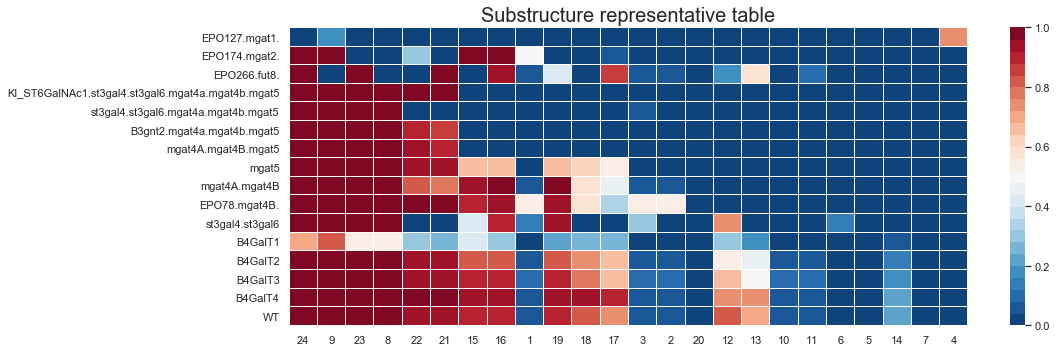

In [26]:

substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order, columns=range(1,25))
substre_profile=substre_profile[[i for i in rearanged_list]]
fig, ax = plt.subplots(figsize=(16,5))
substre_profile=substre_profile.round(5)
substre_profile.to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_abundance_representatives.csv")
sns.heatmap(substre_profile.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
plt.title('Substructure representative table', size=20)
plt.tight_layout()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_raw_abundance_sub.eps')
plt.show()
# substre_profile_zscore.round(2).to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"substre_profile_zscore.txt"))

# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_sub_shifted.eps')
# plt.show()

# 1-sample one-side wilcoxn test with zsplit
### zsplit includes zero-differences in the ranking process and splits the zero rank between positive and negative ones

In [27]:
# from scipy.stats import shapiro, anderson, boxcox
from scipy.stats import yeojohnson, probplot, wilcoxon
from scipy import stats

# i = substre_profile.columns[0]
# _a, _b = wilcoxon(substre_profile[i]-j, zero_method='zsplit')

# wilcoxon_statistic_table = np.zeros(substre_profile.shape)
# p_value_table = np.zeros(substre_profile.shape)
# for idex, i in enumerate(substre_profile.columns):
# #     print(substre_profile[i])
#     b_a,b_b = wilcoxon(substre_profile[i]-substre_profile[i][-1], zero_method='zsplit', correction=True, alternative='greater')
#     for jdex, j in enumerate(substre_profile[i]):
# #         print(substre_profile[i]-j)
# #         print('j:',j, )
# #         print(type(i), type(j))
#         if j > substre_profile[i][-1]:
#             test = 'greater'
#         else:
#             test = 'less'
#         _a,_b=wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True, alternative=test)
# #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
#         wilcoxon_statistic_table[jdex,idex]=b_a-_a
#         p_value_table[jdex,idex]=_b if _b < 0.5 else 1-_b

        
# substre_profile=pd.read_csv(keywords_dict['intermediate_dir']+keywords_dict['project_name']+"_abundance_representatives.csv", index_col=0)
substre_profile.columns=range(1,25)
substre_profile

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
EPO127.mgat1.,0.00000,0.16057,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.72793
EPO174.mgat2.,1.00000,1.00000,0.00000,0.00000,0.30769,0.00000,0.98525,0.96865,0.48765,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
EPO266.fut8.,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.91888,0.04455,0.40672,...,0.00000,0.15776,0.57650,0.00000,0.07602,0.02247,0.03307,0.00000,0.00000,0.00000
KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,0.99280,0.99520,0.98040,0.98040,0.96691,0.96130,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
st3gal4.st3gal6.mgat4a.mgat4b.mgat5,0.99476,0.99651,0.97687,0.97687,0.00000,0.00000,0.00000,0.00000,0.02645,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00233,0.00000,0.00000,0.03158,0.00000
B3gnt2.mgat4a.mgat4b.mgat5,0.99319,0.99546,0.99092,0.99092,0.88657,0.86686,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat4A.mgat4B.mgat5,1.00000,1.00000,1.00000,1.00000,0.91540,0.89799,0.00000,0.00000,0.00570,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat5,1.00000,1.00000,1.00000,1.00000,0.95254,0.94780,0.66784,0.66784,0.01110,0.66784,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mgat4A.mgat4B,1.00000,1.00000,1.00000,1.00000,0.80669,0.77205,0.94536,0.97474,0.06393,0.97474,...,0.00630,0.00000,0.00000,0.00000,0.00000,0.00210,0.00183,0.00000,0.00000,0.00000
EPO78.mgat4B.,1.00000,1.00000,1.00000,1.00000,0.98373,0.97884,0.87584,0.91525,0.54083,0.91525,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [28]:
from scipy.stats import norm
import numpy as np
def get_effect_size(p, sample_size=16):
    return np.abs(norm.ppf(p)/np.sqrt(sample_size))

print(get_effect_size(0.0031))
for idex in [18,20]:
    i = substre_profile.columns[idex]
    for jdex in [2]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        
        print(_a, _b, get_effect_size(_b))
    print("\n")

0.6842530416211653
19 greater 0.07602 EPO266.fut8.
2.5 0.00027233836108283345 0.8644411940657835


21 greater 0.03307 EPO266.fut8.
0.5 0.0002030214484087167 0.8840311883985099




In [29]:
#St3gal4/6
reload(stats)
i = substre_profile.columns[12]
jdex= -6
# help(stats.wilcoxon)
j = substre_profile[i][-6]

if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print("st3gal4.st3gal6: Rep",_a, _b, get_effect_size(_b))


i = substre_profile.columns[19]
# jdex=substre_profile.index[-6]
# help(stats.wilcoxon)
j = substre_profile[i][-6]
if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print(_a, _b, get_effect_size(_b))

13 greater 0.27765 st3gal4.st3gal6
st3gal4.st3gal6: Rep 9.5 0.001331693992636731 0.7510332699033224
20 greater 0.13302 st3gal4.st3gal6
0.5 0.00023493347892443456 0.8743428828779


In [30]:
for idex in [8,12,13, 14]:
    i = substre_profile.columns[idex]
    for jdex in [7,8,9]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

for idex in range(15,22):
    i = substre_profile.columns[idex]
    for jdex in range(7,10):
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

9 less 0.0111 mgat5
18.5 0.00561554794524357 0.6338562626601719
9 greater 0.06393 mgat4A.mgat4B
51.5 0.20386529659727454 0.20697347352168877
9 greater 0.54083 EPO78.mgat4B.
0.5 0.0002633412461079878 0.8667014203720715


13 less 0.0111 mgat5
25.5 0.014799825955957377 0.5438516782058542
13 greater 0.06603 mgat4A.mgat4B
38.5 0.0665399626006086 0.3755166349516612
13 greater 0.54083 EPO78.mgat4B.
0.5 0.00025994674622859443 0.8675729152331485


14 less 0.0111 mgat5
42.5 0.09674099214411941 0.32508680976885984
14 greater 0.06288 mgat4A.mgat4B
22.5 0.009625745597948222 0.5851562575839482
14 greater 0.54083 EPO78.mgat4B.
0.5 0.00024613234937270913 0.8712326501805452


15 less 0.0 mgat5
33.0 0.03191303804748083 0.46334820431459367
15 less 0.0063 mgat4A.mgat4B
2.5 0.00023979932198436152 0.872974877694162
15 less 0.0 EPO78.mgat4B.
33.0 0.03191303804748083 0.46334820431459367


16 less 0.0 mgat5
22.5 0.00877425727946951 0.5937522907154171
16 less 0.0 mgat4A.mgat4B
22.5 0.00877425727946951 0.5937522

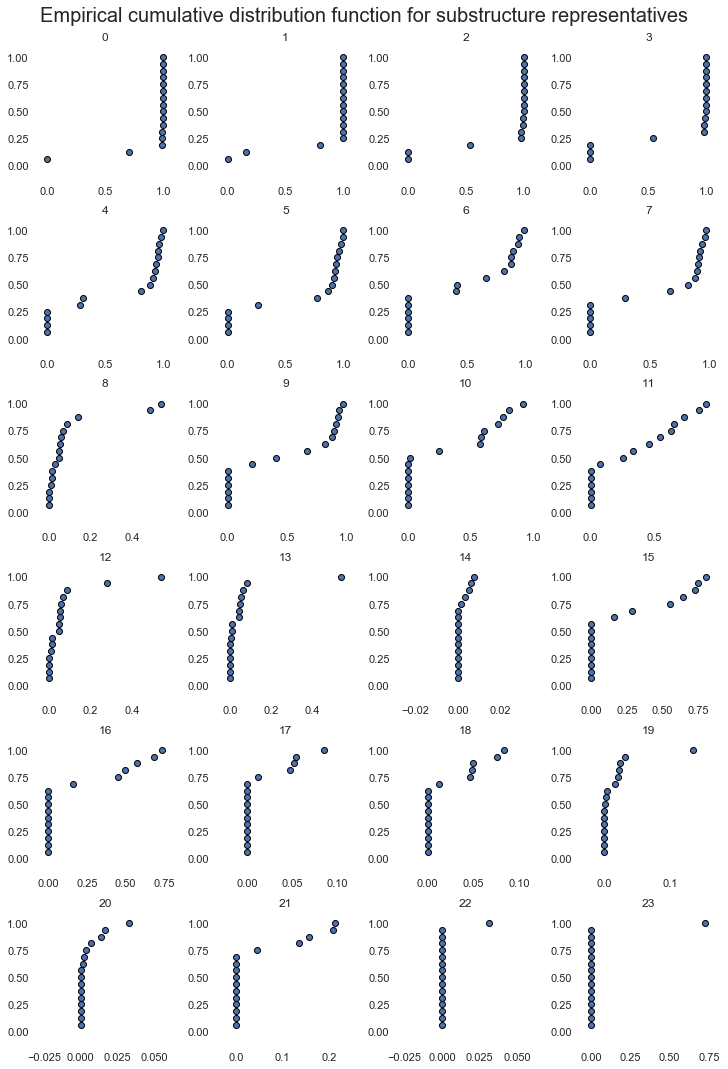

In [31]:

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x=x, y=y)
    plt.show()

_count = 0
_len = 4
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(6, 4, constrained_layout=True)
# fig.patch.set_facecolor('white')
fig.suptitle('Empirical cumulative distribution function for substructure representatives', size=20)

fig.set_size_inches(10,15)
for idex, i in enumerate(substre_profile.columns):
#     fig.add_subplot(4, 6, idex+1)
    #             print(i)
    #             print(divmod(_count, _a))
    _x, _y = divmod(_count, _len)
    x = np.sort(substre_profile[i])
    n = x.size
    y = np.arange(1, n+1) / n
    axe=ax[_x][_y]
    axe.set_ylim(-0.1,1.1)
#     axe.set_xlim(-0.1,1.1)
    axe.set_facecolor('white')
    axe.scatter(x=x, y=y ,edgecolors='black')
    axe.set_title(str(idex))
#     plt.show()
    _count += 1
# plt.show()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+"_ECDF.eps")


# Selected the example for Figure 2d, 3

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
def compare_profile(profile_table, name_list, ax, addr=None):
    # data to plot

    # create plot
    profile_table.columns=name_list
#     print('a', profile_table.shape)
#     print('a', profile_table)
#     for i in zip(range(profile_table.shape[0]),profile_table.iloc[:,0]):
#         print(i)
#     print(profile_table.iloc[0,0])
#     print('fini')
    index = np.arange(profile_table.shape[0])
    bar_width = min(0.25, 1/(profile_table.shape[1]+2))
    opacity = 0.8
    rects_list=[0]*profile_table.shape[1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 ,3))
        ax.set_facecolor('white')
#         plt
        plt.xlabel('Substructure', size=20)
        plt.ylabel('Stdscaled difference', size=20)
        plt.title('Glycoprofile comparison', size=20)
        plt.xlabel('Substructure', size=20)
        plt.ylim(-5,5)
        
        for i,j in enumerate(profile_table.columns):
            plt.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        plt.legend(name_list, loc=1)
        plt.yticks(size=15)
        plt.axhline(y=0, color='Black', linestyle='-',linewidth=0.1)
        plt.yticks([-4,-2,0,2,4], ['-4','-2','0','2','4'])
        plt.xticks(index-1/(profile_table.shape[1]+2), ([str(x) for x in range(1, profile_table.shape[0]+1)]))
        plt.savefig(addr)
        plt.tight_layout()
    else:
#         print(name_list)
        print('index', index)
        ax.set_facecolor('white')
        ax.set_ylim(-5,5)
#     ax.set_yticklabels(size=15)
        
    
        for i,j in enumerate(profile_table.columns):
            ax.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        ax.legend(name_list, loc=2)
        ax.set_yticks([-4,-2,0,2,4])
        ax.axhline(y=0, color='Black', linestyle='-',linewidth=0.5)
        ax.set_yticklabels(['-4','-2','0','2','4'])
        ax.set_xticks(index-1/(profile_table.shape[1]+2), )
        ax.set_xticklabels(([str(x) for x in range(1, profile_table.shape[0]+1)]))
    if addr:
        
#     ax.tight_layout()
        plt.savefig(addr)
# compare_profile(substre_profile[])

# Raw plots and related plots for Figure 2d

In [33]:

# fig, axes = plt.subplots(2, 1, squeeze=False, facecolor='white')

# # plt.title(title)
# fig.set_size_inches(8, 6)
# _count = 0
# # _profile_dict={1:["EPO127.mgat1.", "EPO174.mgat2.", "EPO266.fut8.", "st3gal4.st3gal6"]
# # _name_list = [x for x in mod_profile_dict[i]]
# condense_plot = ["EPO266.fut8.", "st3gal4.st3gal6", ]
# condense_plot_name = ['EPO266.KO_fut8','KO_st3gal4/6']
# sns.set(palette='Accent_r')

substre_profile_zscore=substre_profile.apply(zscore)


# fig, ax = plt.subplots(figsize=(16, 5))
# sns.heatmap(substre_profile_zscore.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 40), linewidths=.01, linecolor='white', annot=True)

if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base


# for idex, i in enumerate(condense_plot):
#     #             print(i)
#     #             print(divmod(_count, _a))
#     _name_list = [i]
    
# #     _x, _y = divmod(_count, _len)
#     ax=axes[idex][0]
#     compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), [condense_plot_name[idex]], ax=ax)#addr=__init__.plot_output_address+"substructure_cluster_"+str(i)+".eps")
# #     _count += 1
# plt.savefig(keywords_dict['plot_output_dir']+"substructure_cluster_condense.eps")

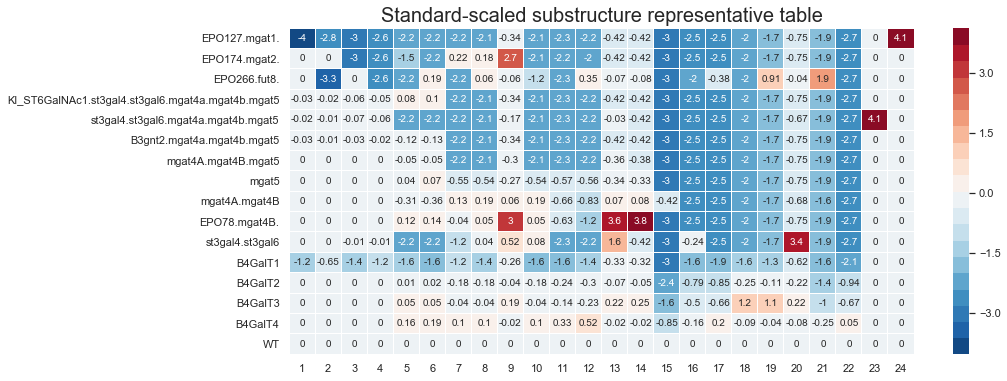

In [34]:
substre_profile_zscore_with_baseWT1=substre_profile_zscore_with_baseWT.transpose()
substre_profile_zscore_with_baseWT1.to_csv(keywords_dict['plot_output_dir']+keywords_dict['project_name']+ r"_substructure_matrix_std_base.txt")
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(substre_profile_zscore_with_baseWT1.round(2), annot=True, ax=ax, cmap=sns.color_palette("RdBu_r", 20), linewidths=.005, linecolor='white')
plt.title('Standard-scaled substructure representative table', size=20)

plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_adjusted_abundance_zscore.eps')
plt.show()


# Raw plots and related plots for Figure 3

['EPO127.mgat1.']
['EPO174.mgat2.']
['EPO266.fut8.', 'st3gal4.st3gal6']
['KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5']
['mgat5', 'mgat4A.mgat4B', 'EPO78.mgat4B.']
['B4GalT1', 'B4GalT2', 'B4GalT3', 'B4GalT4', 'WT']


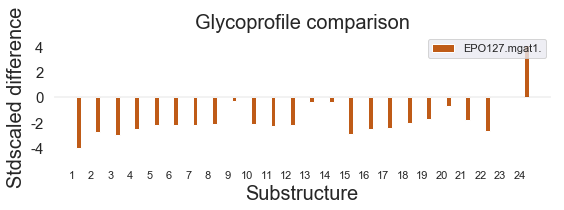

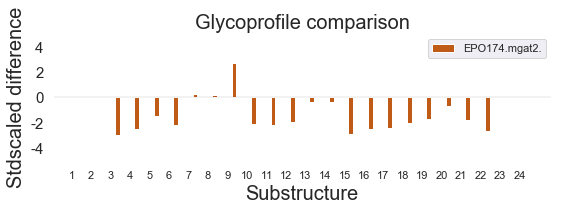

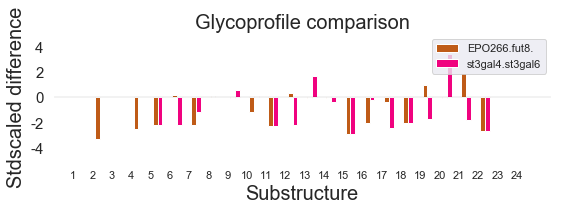

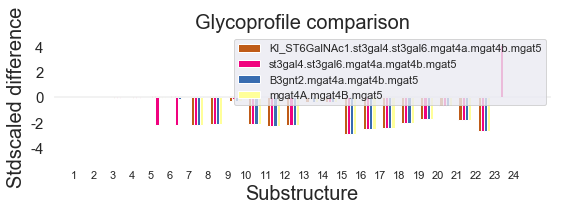

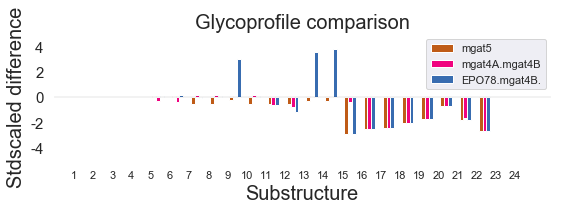

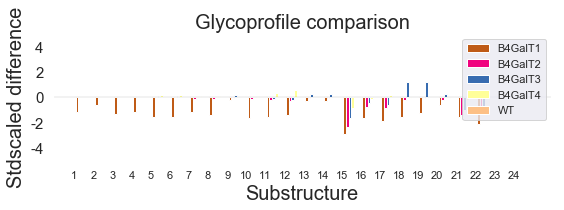

In [35]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8.","st3gal4.st3gal6"],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],

7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}
mod_profile_dict=profile_dict
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
#     print(substre_profile_zscore_with_baseWT[i])
#     print(substre_profile_zscore_with_baseWT[i])
for i in sorted(mod_profile_dict):
#     for j in profile_dict[i]:
    _name_list = [x for x in mod_profile_dict[i]]
#     print(_name_list, len(_name_list))
    print(_name_list)
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), _name_list, ax=None, addr=keywords_dict['plot_output_dir']+keywords_dict['project_name']+"cluster_rep_abd_std_scaled"+str(i)+".eps")
    



In [36]:
# from sklearn.decomposition import PCA as pca
# # Y_sklearn = sklearn_pca.fit_transform(X_std)
# group_list = [1,1,1,2,2,2,2,4,3,3,3,5,5,5,5,5]

In [ ]:
# import matplotlib.pyplot as plt
# def _pca(data_table, group_list):
#     sklearn_pca = pca(n_components=3)
#     projected = sklearn_pca.fit_transform(data_table)
#     print(sklearn_pca.explained_variance_ratio_)

#     fig, ax = plt.subplots()
# #     ax.scatter(z, y)


#     plt.scatter(projected[:, 0], projected[:, 1],
#                 c=group_list, edgecolor='none', alpha=0.5,
#                 cmap=plt.cm.get_cmap('Dark2',5), )
#     plt.xlabel('component 1')
#     plt.ylabel('component 2')
#     for i, txt in enumerate(data_table.index.tolist()):
#         ax.annotate(txt, (projected[i, 0]+0.1, projected[i,1]))
#     plt.colorbar();
    


In [ ]:
# _pca(substre_profile.round(2), group_list)

In [ ]:
# _pca(substre_profile_zscore.round(2), group_list)

In [ ]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly 
# plotly.tools.set_credentials_file(username='hoveathly', api_key='bcBZdP07AvxyJ605DwHM')

In [ ]:
# ax.scatter(xs, ys, zs, marker=m)

# plt.colorbar();
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [ ]:
# for i in substre_profile.index.tolist():
#     print(i)

In [ ]:
# # x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()
# sklearn_pca = pca(n_components=3)
# projected = sklearn_pca.fit_transform(substre_profile)
# trace1 = go.Scatter3d(
#     x=projected[:, 0],
#     y=projected[:, 1],
#     z=projected[:, 2],
#     text=substre_profile_zscore.index.tolist(),
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=group_list,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     autosize=True,
#     hovermode='closest',
#     showlegend=False,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )

# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale-2')